In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation,digits
import re

In [ ]:
import tensorflow as tf
import keras
from keras import layers

In [ ]:
od.download('https://www.kaggle.com/datasets/sayedshaun/english-to-bengali-for-machine-translation/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aryan7004
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sayedshaun/english-to-bengali-for-machine-translation


100%|██████████| 1.71M/1.71M [00:00<00:00, 86.7MB/s]

In [ ]:
df = pd.read_csv('/content/english-to-bengali-for-machine-translation/english to bengali.csv')

In [ ]:
df.head()

,english_caption,bengali_caption
0,a child in a pink dress is climbing up a set o...,একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্...
1,a girl going into a wooden building .,একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে
2,a little girl climbing into a wooden playhouse .,একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে ।
3,a little girl climbing the stairs to her playh...,ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে
4,a little girl in a pink dress going into a woo...,গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি...


In [ ]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [ ]:
remove = punctuation
remove_nums = str.maketrans("","",digits)
def preprocessing(text,language):
  text = str(text)
  text = text.lower()
  if language=='English':
    text = ' '.join(contractions[word] if word in contractions else word for word in text.split())
  text = ''.join(ch for ch in text if ch not in remove)
  text = re.sub("'","",text)
  text = re.sub(' +'," ",text)
  text = re.sub('।',"",text)
  text = text.translate(remove_nums)
  text = text.strip()
  return text

In [ ]:
df['english_caption'] = df['english_caption'].apply(lambda x:preprocessing(x,'English'))
df['bengali_caption'] = df['bengali_caption'].apply(lambda x:preprocessing(x,'Bengali'))

In [ ]:
df.head()

,english_caption,bengali_caption
0,a child in a pink dress is climbing up a set o...,একটি গোলাপী জামা পরা বাচ্চা মেয়ে একটি বাড়ির প্...
1,a girl going into a wooden building,একটি মেয়ে শিশু একটি কাঠের বাড়িতে ঢুকছে
2,a little girl climbing into a wooden playhouse,একটি বাচ্চা তার কাঠের খেলাঘরে উঠছে
3,a little girl climbing the stairs to her playh...,ছোট মেয়েটি তার খেলার ঘরের সিড়ি বেয়ে উঠছে
4,a little girl in a pink dress going into a woo...,গোলাপি জামা পড়া ছোট একটি মেয়ে একটি কাঠের তৈরি...


In [ ]:
sentence_en = df['english_caption'].to_numpy()
sentence_bn = df['bengali_caption'].to_numpy()
valid_split = 0.1
valid_size = int(len(df)*valid_split)
train_en = sentence_en[:-valid_size]
train_bn = sentence_bn[:-valid_size]
valid_en = sentence_en[-valid_size:]
valid_bn = sentence_bn[-valid_size:]

In [ ]:
def create_sentence_target(sentence_en,sentence_bn):
  return (sentence_en,b"sos "+sentence_bn),sentence_bn+b" eos"

In [ ]:
def create_dataset(sentence_en,sentence_bn,batch_size=32,cache=True,shuffle=False,shuffle_size=10000):
  dataset = tf.data.Dataset.from_tensor_slices((sentence_en,sentence_bn))
  dataset = dataset.map(create_sentence_target,num_parallel_calls=tf.data.AUTOTUNE)
  if cache:
    dataset = dataset.cache()
  if shuffle:
    dataset = dataset.shuffle(shuffle_size)
  return dataset.batch(batch_size)

In [ ]:
train_ds = create_dataset(train_en,train_bn)
valid_ds = create_dataset(valid_en,valid_bn)

In [ ]:
@keras.saving.register_keras_serializable()
class PositionalEncoding(layers.Layer):

  def __init__(
      self,max_sentence_len = 50,embedding_size = 256, dtype = tf.float32, **kwargs
      ):
    super().__init__(dtype = dtype,**kwargs)
    if embedding_size %2!=0:
      raise ValueError("embedding_size must be even")
    p,i = np.meshgrid(np.arange(max_sentence_len),np.arange(embedding_size//2))
    pos_emb = np.empty((1,max_sentence_len,embedding_size))
    pos_emb[:,:,0::2] = np.sin(p/10_000**(2*i/embedding_size)).T
    pos_emb[:,:,1::2] = np.cos(p/10_000**(2*i/embedding_size)).T
    self.positional_embedding = tf.constant(pos_emb.astype(self.dtype))
    self.supports_masking = True

  def call(self, inputs):
    batch_max_length = tf.shape(inputs)[1]
    return inputs + self.positional_embedding[:, :batch_max_length]

  def get_config(self):
      config = super().get_config()
      config.update({
            'dtype' : self.dtype,
      })
      return config

In [ ]:
@keras.saving.register_keras_serializable()
class Encoder(layers.Layer):

  def __init__(
      self,embedding_size = 256, n_attention_heads = 8,n_units_dense = 256, dropout_rate = 0.2,**kwargs
      ):
    super().__init__(**kwargs)
    self.multi_head_attention = layers.MultiHeadAttention(n_attention_heads, embedding_size, dropout = dropout_rate)
    self.feed_forward = keras.Sequential(
        [
            layers.Dense(n_units_dense, activation = "relu", kernel_initializer = "he_normal"),
            layers.Dense(embedding_size, kernel_initializer= "he_normal")
        ]
    )
    self.add = layers.Add()
    self.normalization = layers.LayerNormalization()

  def call(self,inputs,mask=None):
      Z= inputs
      skip_z = Z
      Z = self.multi_head_attention(Z,value = Z,attention_mask = mask)
      Z = self.normalization(self.add([Z,skip_z]))
      skip_z = Z

      Z = self.feed_forward(Z)
      Z = self.normalization(self.add([Z,skip_z]))
      return Z
  def get_config(self):
      config = super().get_config()
      config.update({
            'multi_head_attention': self.multi_head_attention,
            'feed_forward': self.feed_forward,
            'add': self.add,
            'normalization': self.normalization,
      })
      return config

In [ ]:
@keras.saving.register_keras_serializable()
class Decoder(layers.Layer):

  def __init__(
      self,embedding_size = 256,n_attention_head = 8,n_units_dense = 256,dropout_rate = 0.2,**kwargs
      ):
    super().__init__(**kwargs)
    self.masked_multi_head_attention = layers.MultiHeadAttention(n_attention_head,embedding_size,dropout = dropout_rate)
    self.multi_head_attention = layers.MultiHeadAttention(n_attention_head, embedding_size, dropout = dropout_rate)
    self.normalization = layers.Normalization()
    self.add = layers.Add()
    self.feed_forward = keras.Sequential(
        [
            layers.Dense(n_units_dense,activation = "relu",kernel_initializer = "he_normal"),
            layers.Dense(embedding_size,kernel_initializer = "he_normal"),
            layers.Dropout(dropout_rate),
        ]
        )
  def call(self,inputs,mask=None):
    decoder_mask, encoder_mask = mask
    Z, encoder_output = inputs
    Z_skip = Z
    Z = self.masked_multi_head_attention(Z,value=Z,attention_mask = decoder_mask)
    Z = self.normalization(self.add([Z_skip,Z]))
    Z_skip = Z
    Z = self.multi_head_attention(Z,value = encoder_output,attention_mask = encoder_mask)
    Z = self.normalization(self.add([Z,Z_skip]))
    Z_skip = Z
    Z = self.feed_forward(Z)
    Z = self.normalization(self.add([Z_skip,Z]))
    return Z
  def get_config(self):
      config = super().get_config()
      config.update({
            'masked_multi_head_attention': self.masked_multi_head_attention,
            'multi_head_attention': self.multi_head_attention,
            'normalization': self.normalization,
            'add': self.add,
            'feed_forward' : self.feed_forward,
      })
      return config

In [ ]:
@keras.saving.register_keras_serializable()
class Transformer(keras.Model):
  def __init__(
      self,
      vocabulary_size = 200000,
      max_sentence_len = 50,
      embedding_size = 256,
      n_encoder_decoder_blocks = 1,
      n_attention_heads = 8,
      n_units_dense = 256,
      dropout_rate = 0.2,
      **kwargs
  ):
   super().__init__(**kwargs)
   self.max_sentence_len = max_sentence_len
   self.tokenizer_en = layers.TextVectorization(vocabulary_size,output_sequence_length = max_sentence_len)
   self.tokenizer_bn = layers.TextVectorization(vocabulary_size,output_sequence_length = max_sentence_len)
   self.encoder_embedding = layers.Embedding(
      vocabulary_size,embedding_size, mask_zero = True
   )
   self.decoder_embedding = layers.Embedding(
      vocabulary_size, embedding_size, mask_zero = True
   )
   self.positional_encoding = PositionalEncoding(max_sentence_len,embedding_size)
   self.encoder_blocks = [
      Encoder(embedding_size,n_attention_heads,n_units_dense,dropout_rate)
      for _ in range(n_encoder_decoder_blocks)
   ]
   self.decoder_blocks = [
      Decoder(embedding_size,n_attention_heads,n_units_dense,dropout_rate)
      for _ in range(n_encoder_decoder_blocks)
   ]
   self.output_layer = layers.Dense(vocabulary_size,activation = 'softmax')

  def call(self,inputs):
   encoder_inputs, decoder_inputs = inputs

   encoder_input_ids = self.tokenizer_en(encoder_inputs)
   decoder_input_ids = self.tokenizer_bn(decoder_inputs)

   encoder_embeddings = self.encoder_embedding(encoder_input_ids)
   decoder_embeddings = self.decoder_embedding(decoder_input_ids)

   encoder_pos_embeddings = self.positional_encoding(encoder_embeddings)
   decoder_pos_embeddings = self.positional_encoding(decoder_embeddings)

   encoder_pad_mask = tf.math.not_equal(encoder_input_ids,0)[:,tf.newaxis]
   decoder_pad_mask = tf.math.not_equal(decoder_input_ids,0)[:,tf.newaxis]
   batch_max_len_decoder = tf.shape(decoder_embeddings)[1]
   decoder_casual_mask = tf.linalg.band_part(tf.ones((batch_max_len_decoder, batch_max_len_decoder),tf.bool),-1,0)

   decoder_mask = decoder_casual_mask & decoder_pad_mask

   Z = encoder_pos_embeddings
   for encoder_block in self.encoder_blocks:
     Z = encoder_block(Z,mask = encoder_pad_mask)
   encoder_output = Z
   Z = decoder_pos_embeddings
   for decoder_block in self.decoder_blocks:
     Z = decoder_block(
        [Z, encoder_output], mask = [decoder_mask, encoder_pad_mask]
    )
   Z = self.output_layer(Z)
   return Z

  def get_config(self):
    config = super().get_config()
    config.update({
          'tokenizer_en': self.tokenizer_en,
          'tokenizer_bn': self.tokenizer_bn,
          'encoder_embedding': self.encoder_embedding,
          'decoder_embedding': self.decoder_embedding,
          'positional_encoding':self.positional_encoding,
          'encoder_blocks': self.encoder_blocks,
          'decoder_blocks': self.decoder_blocks,
          'output_layer': self.output_layer
    })
    return config

In [ ]:
transformer_model = Transformer(max_sentence_len=15)

In [ ]:
def adapts_compile_fit(model,
                       train_data,
                       valid_data,
                       n_epochs = 40,
                       n_patience = 15,
                       init_lr = 0.001,
                       lr_decay_rate = 0.1):
  model.tokenizer_en.adapt(train_data.map(lambda sentence,target:sentence[0],num_parallel_calls = tf.data.AUTOTUNE,))
  model.tokenizer_bn.adapt(train_data.map(lambda sentence,target:sentence[1]+b" eos",num_parallel_calls = tf.data.AUTOTUNE))

  train_data_prepared = train_data.map(
        lambda sentences, target: (sentences,model.tokenizer_bn(target)),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

  valid_data_prepared = valid_data.map(
        lambda sentences, target: (sentences,model.tokenizer_bn(target)),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  print(model.tokenizer_bn.get_vocabulary())
  print(model.tokenizer_bn.vocabulary_size())
  print(model.tokenizer_en.vocabulary_size())
  early_stopping = keras.callbacks.EarlyStopping(monitor="train_accuracy",patience = n_patience,restore_best_weights = True)
  n_decay_steps = n_epochs * len(list(train_data_prepared))
  scheduled_lr = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=n_decay_steps,
        decay_rate=lr_decay_rate)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer = keras.optimizers.RMSprop(learning_rate = scheduled_lr),
                metrics = ['accuracy'])
  return model.fit(train_data_prepared,
                   epochs = n_epochs,
                   validation_data = valid_data_prepared
                   ,verbose=1)

In [ ]:
history = adapts_compile_fit(transformer_model,train_ds,valid_ds,n_epochs = 50,init_lr = 0.0002,lr_decay_rate=0.04)

['', '[UNK]', 'sos', 'eos', 'একটি', 'একজন', 'কুকুর', 'আছে', 'লোক', 'এক', 'করছে', 'এবং', 'উপর', 'সাদা', 'কালো', 'মহিলা', 'বসে', 'তার', 'খেলছে', 'দুটি', 'পরা', 'রঙের', 'ছেলে', 'লাল', 'দিয়ে', 'ছোট', 'পরিহিত', 'ও', 'নীল', 'দাঁড়িয়ে', 'মধ্যে', 'পাশে', 'নিয়ে', 'ব্যক্তি', 'বাচ্চা', 'করে', 'লাফ', 'দিচ্ছে', 'সামনে', 'দিকে', 'যাচ্ছে', 'ধরে', 'মেয়ে', 'জামা', 'শিশু', 'দৌড়াচ্ছে', 'থেকে', 'দিয়ে', 'পরে', 'দাঁড়িয়ে', 'কুকুরটি', 'দুজন', 'বল', 'সাথে', 'ঘাসের', 'নিয়ে', 'বাদামী', 'পানিতে', 'কিছু', 'জন্য', 'একদল', 'সবুজ', 'মেয়ে', 'হলুদ', 'পোশাক', 'মাঠে', 'দুই', 'মুখে', 'লোকটি', 'আছেন', 'বালক', 'মানুষ', 'দেখছে', 'হাতে', 'সাইকেল', 'নারী', 'টুপি', 'বাইরে', 'চালাচ্ছে', 'পানির', 'বাদামি', 'উপরে', 'ছবি', 'পুরুষ', 'পড়া', 'থাকা', 'ছোট্ট', 'ছেলেটি', 'ফুটবল', 'সৈকতে', 'হাঁটছে', 'তাকিয়ে', 'কুকুরের', 'রাস্তায়', 'হাত', 'রাস্তায়', 'কমলা', 'দুইজন', 'পিছনে', 'দাড়িয়ে', 'দৌড়াচ্ছে', 'তিনটি', 'জ্যাকেট', 'খেলনা', 'অন্য', 'করছেন', 'শার্ট', 'নিচে', 'তাদের', 'মেয়েটি', 'বরফের', 'চেষ্টা', 'হাসছে', 'গাছের', 'শূন্যে', 'তিনজন', 

In [ ]:
def translate(model,sentence_en):
  answer = ""
  for i in range(model.max_sentence_len):
    X_encoded = np.array([sentence_en])
    X_decoded = np.array(["sos "+answer])
    y_prob = model.predict((X_encoded,X_decoded),verbose=0)[0,i]
    y_prob_id = np.argmax(y_prob)
    predicted_word = model.tokenizer_bn.get_vocabulary()[y_prob_id]
    if predicted_word=="eos":
      break
    answer = answer + " " + predicted_word
  return answer.strip()

In [ ]:
sentence = "a little girl going into a wooden building"

In [ ]:
translate(transformer_model,sentence)

'একটি ছোট মেয়ে একটি কাঠের দিয়ে একটি কাঠের দিয়ে যাচ্ছে'

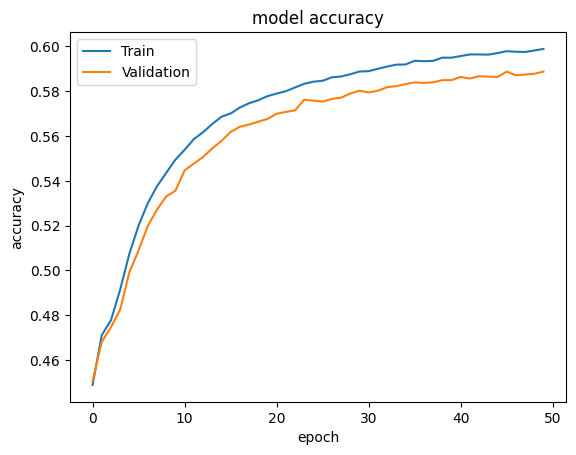

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

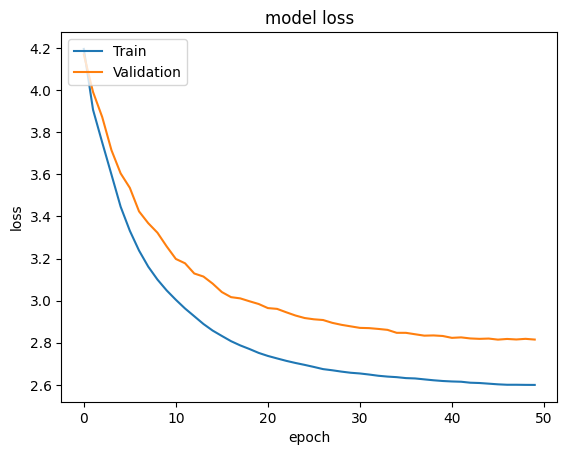

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transformer_model.save('/content/drive/MyDrive/bengali_transformer_model')